# Problema 1

## Modulos 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import random
import math

## Datos

In [2]:
data1= pd.read_csv("Conjunto de Datos 1.csv")

In [3]:
data1.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


### Upper Confidence Bound

In [5]:
N=10000
d=10
anuncio=0
numeroDeSelecciones=[0]*d
sumaDeLasRecompensas=[0]*d
anuncios_seleccionados=[]
recompensaTotal=0
for n in range(0,N):
    maximo_intervalo_superior=0;
    for i in range(0,d):
        if numeroDeSelecciones[i]>0:
            recompensamedia=sumaDeLasRecompensas[i]/numeroDeSelecciones[i]
            delta_i=math.sqrt(3/2*math.log(n+1)/numeroDeSelecciones[i])
            intervalodeconfianzasuperior=recompensamedia+delta_i
        else:
            intervalodeconfianzasuperior= i*400*10#ie400
        if intervalodeconfianzasuperior>maximo_intervalo_superior:
            maximo_intervalo_superior=intervalodeconfianzasuperior
            anuncio=i
    anuncios_seleccionados.append(anuncio)
    numeroDeSelecciones[anuncio]=numeroDeSelecciones[anuncio]+1
    recompensa=data1.values[n,anuncio]
    sumaDeLasRecompensas[anuncio]=sumaDeLasRecompensas[anuncio]+recompensa
    recompensaTotal=recompensaTotal+recompensa

In [7]:
recompensaUBC= recompensaTotal

In [9]:
print(f"La recompensa total obtenida por UBC es de {recompensaUBC} puntos ")

La recompensa total obtenida por UBC es de 2271 puntos 


#### Histrograma

Text(0, 0.5, 'Fracuencia de la visualizacion del anuncio')

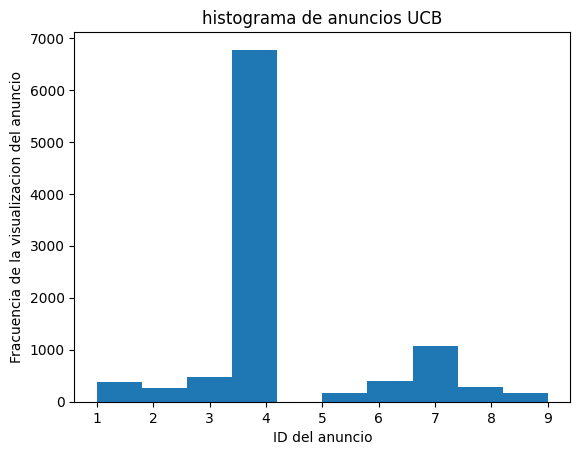

In [10]:
plt.hist(anuncios_seleccionados)
plt.title("histograma de anuncios UCB")
plt.xlabel("ID del anuncio")
plt.ylabel("Fracuencia de la visualizacion del anuncio")

### Muestreo de Thompson

In [14]:
N=10000
d=10
numerodeRecompensas1=[0.000001]*d
numerodeRecompensas0=[0.000001]*d
anuncios_seleccionados=[]
recompensaTotal=0
for n in range(0,N):
    maximo_valor_aleatorio=0;
    anuncio=0
    for i in range(0,d):
        random_beta=random.betavariate(numerodeRecompensas1[i]+1,numerodeRecompensas0[i]+0)
        if random_beta>maximo_valor_aleatorio:
            maximo_valor_aleatorio=random_beta
            anuncio=i
    anuncios_seleccionados.append(anuncio)
    recompensa=data1.values[n,anuncio]
    if recompensa==1:
        numerodeRecompensas1[anuncio]+=1
    else:
        numerodeRecompensas0[anuncio]+=1
    recompensaTotal+=recompensa

In [15]:
recompensaThompson= recompensaTotal

In [16]:
print(f"La recompensa total obtenida por el muestro de thompson es de {recompensaThompson} puntos ")

La recompensa total obtenida por el muestro de thompson es de 2597 puntos 


#### Histrograma

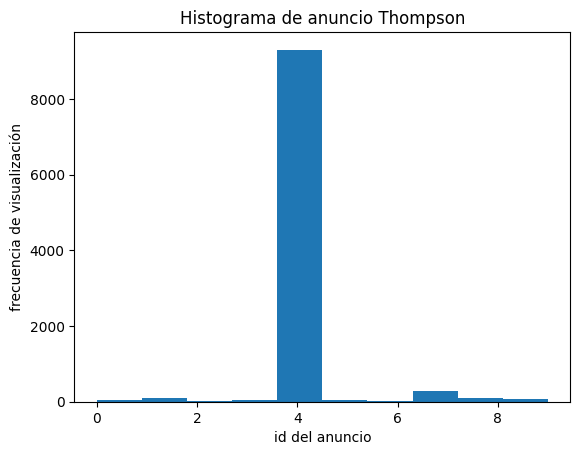

In [17]:
plt.hist(anuncios_seleccionados)
plt.title('Histograma de anuncio Thompson')
plt.xlabel("id del anuncio")
plt.ylabel("frecuencia de visualización")
plt.show()

### Comparación

In [19]:
print(f"Recompensa UCB: {recompensaUBC} \nRecompensa Thompson: {recompensaThompson}")

Recompensa UCB: 2271 
Recompensa Thompson: 2597


# Problema 2

## Modulos

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import confusion_matrix

## Datos

In [21]:
data2= pd.read_csv("Conjunto de Datos 2.csv")

In [22]:
data2.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
X= data2.iloc[:,3:13].values
y= data2.iloc[:,13].values

## Preprocesamiento 

### One Hot Encoder

In [24]:
ls= ColumnTransformer([('Geography', OneHotEncoder(categories='auto'), [1])], remainder="passthrough")
X= ls.fit_transform(X)
X= X[:,1:]
ls= ColumnTransformer([('Gender', OneHotEncoder(categories='auto'), [3])], remainder="passthrough")
X= ls.fit_transform(X)
X= X[:,1:]

### Dividir datos

In [25]:
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size=.20, random_state=42)

### Escalar datos

In [26]:
sx= StandardScaler()
x_train = sx.fit_transform(x_train)
x_test = sx.fit_transform(x_test)

## Modelo

### Arquitectura

In [27]:
clasificador = Sequential()
clasificador.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=11))
clasificador.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
clasificador.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
clasificador.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

2023-05-23 12:02:12.962424: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-23 12:02:12.971876: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-23 12:02:12.971925: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bluterplay-HP): /proc/driver/nvidia/version does not exist
2023-05-23 12:02:13.015295: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Entrenamiento

In [28]:
clasificador.fit(x_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
800/800 [==============================] - 5s 3ms/step - loss: 0.4874 - accuracy: 0.7971
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4017 - accuracy: 0.8196
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3693 - accuracy: 0.8509
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3533 - accuracy: 0.8594
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3487 - accuracy: 0.8593
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3451 - accuracy: 0.8580
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3435 - accuracy: 0.8599
Epoch 8/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3418 - accuracy: 0.8606
Epoch 9/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3402 - accuracy: 0.8627
Epoch 10/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3406 - accura

## Predicciones

In [29]:
y_predice = clasificador.predict(x_test)
y_predBooleano = (y_predice>0.5)

63/63 [==============================] - 0s 2ms/step


### Matriz de confusión

In [34]:
cm = confusion_matrix(y_test,y_predBooleano)
cm

array([[1547,   60],
       [ 222,  171]])

# Problema 3

## Modulos

In [45]:
import pandas

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Datos

In [36]:
data3= pd.read_csv("Conjunto de Datos 3.csv")

In [37]:
data3.head()

,Open Port,PU,MU,Traffic,D
0,11,81,51,115,2
1,3,84,83,189,0
2,3,91,95,80,0
3,6,91,55,75,0
4,5,90,84,171,0


In [38]:
X= data3.iloc[:,:-1].values
y= data3.iloc[:,-1].values

## Preporcesamiento

### Dividir datos

In [42]:
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size=.20, random_state=42)

### Escalar datos

In [43]:
sx= StandardScaler()
x_train = sx.fit_transform(x_train)
x_test = sx.fit_transform(x_test)

## Random Forest

In [46]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [48]:
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

### Predicciones

In [50]:
y_pred = clf.predict(x_test)

In [52]:
accuracy = clf.score(x_test, y_test)
print("Precisión:", accuracy)

Precisión: 0.985


In [54]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[115,   0,   0],
       [  3,   8,   0],
       [  0,   0,  74]])